<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/Gaby/DLY0100_Entrega_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 1 - Entrenando redes feedforward

**Autores:**

+ Nicolas Navarro
+ Gabriela Sandoval

**Correos Electrónicos:**

+ ni.navarroa@duoc.cl
+ g.sandoval@duoc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Deep Learning de la carrera de Ingeniería en Informática de DuocUC sede Concepción.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [ ]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-16 10:01:43--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 172.253.115.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  30.8MB/s    in 0.3s    

2025-04-16 10:01:44 (30.8 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-04-16 10:01:45--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.155.207, 142.250.31.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.155.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [

In [ ]:
!ls -lh

total 16M
-rw-r--r--. 1 root users 4.4M Apr 14 19:19 prueba.pkl
-rw-r--r--. 1 root users 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r--. 1 root users 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r--. 1 root users 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r--. 1 root users  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [ ]:
import gzip
import pandas as pd
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
###
from keras.utils import to_categorical

2025-04-16 10:01:48.384771: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 10:01:48.435481: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-16 10:01:48.435632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-16 10:01:48.436998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-16 10:01:48.444933: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 10:01:48.446406: I tensorflow/core/platform/cpu_feature_guard.cc:1

#Introduccion

Introducción: Descripción del problema y objetivo del modelo.


En este notebook se trabajará con el dataset MNIST, que contiene imágenes de dígitos escritos a mano (0–9). Como primer paso, es fundamental preprocesar los datos antes de entrenar una red neuronal.

Primero, cada imagen tiene un tamaño original de 28x28 píxeles, lo que significa que está compuesta por 784 valores (28×28). Para poder trabajar con estas imágenes en una red neuronal, debemos aplanarlas, es decir, se convierten en un vector de tamaño 784 en lugar de una matriz 2D.

Luego, las imágenes se normalizan, es decir, se dividen sus valores por 255 para que queden entre 0 y 1. Esto mejora la eficiencia del entrenamiento, ya que evita trabajar con números muy grandes que podrían afectar negativamente el cálculo de los gradientes durante el entrenamiento.

Por otra parte, las etiquetas que indican el número que representa cada imagen también deben ser procesadas. En este caso utilizaremos el one-hot encoding, lo que convierte, por ejemplo, un "3" en el vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Esto es necesario porque la red no puede trabajar directamente con números enteros como clases, ya que no entiende que son categorías y no cantidades.

El dataset incluye 60.000 imágenes para entrenamiento y 10.000 para prueba, lo que permite entrenar el modelo con muchos ejemplos y evaluarlo con datos nuevos para medir su capacidad de generalizar.

Finalmente, este preprocesamiento adapta correctamente las imágenes y etiquetas al formato que requiere la red neuronal para aprender de manera efectiva.

# Carga de imágenes

In [ ]:
# Función para cargar imágenes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Función para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificación

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


# Muestra imágenes

In [ ]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

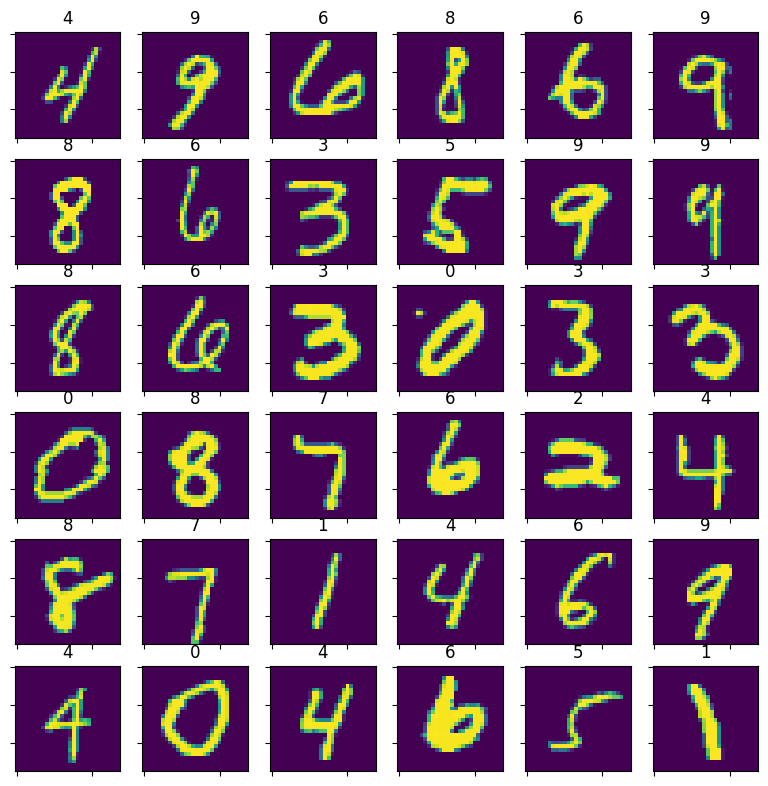

In [ ]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [ ]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de imágenes del número {i}: {numimagen[i]}")

Cantidad de imágenes del número 0: 5923.0
Cantidad de imágenes del número 1: 6742.0
Cantidad de imágenes del número 2: 5958.0
Cantidad de imágenes del número 3: 6131.0
Cantidad de imágenes del número 4: 5842.0
Cantidad de imágenes del número 5: 5421.0
Cantidad de imágenes del número 6: 5918.0
Cantidad de imágenes del número 7: 6265.0
Cantidad de imágenes del número 8: 5851.0
Cantidad de imágenes del número 9: 5949.0


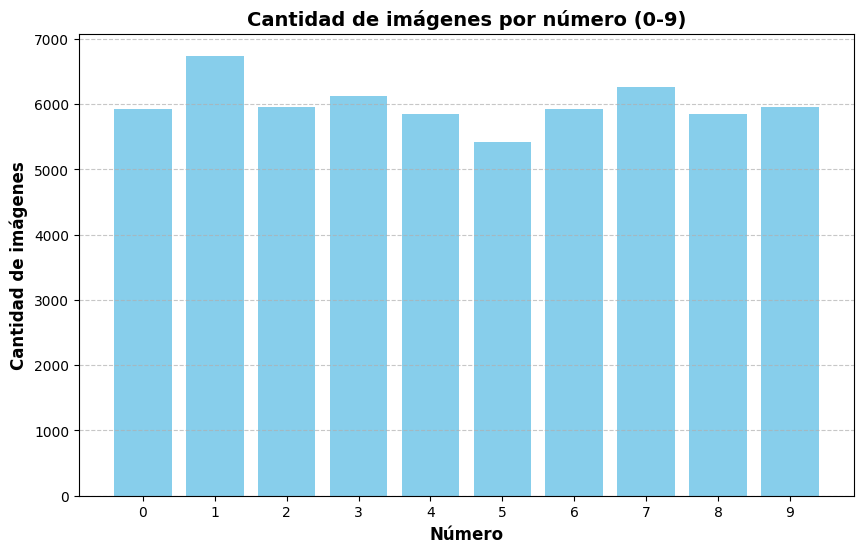

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(numimagen)), numimagen, color='skyblue')
plt.title('Cantidad de imágenes por número (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('Número', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de imágenes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.show()

Las imágenes del dataset están relativamente balanceadas entre las 10 clases. La clase con más ejemplos es el número 1 (6742 imágenes) y la que menos tiene es el número 5 (5421 imágenes). Aunque hay pequeñas diferencias, la distribución es lo suficientemente equilibrada como para entrenar modelos sin riesgo significativo de sesgo hacia una clase específica.

1. explicacion m,n,c
2. explicacion seed
3. explicacion cantidad de capas ocupltas y su valor
4. cantidad de epocas
5. explicacion de funcion loss (si categorical_crossentropy no binary_corss)
5. eleccion de optimizadores (sgd y adam)
6. eleccion de avticadores con sus ventajas (relu y elu)
6. con activacion (relu)
7. vs con avticacion (elu)
8. explicaion de comparacion de fun activacion
9. cambio bachsize y explicacion
10. cambio epocas y explicacion
11. drop out
12. comparacion mejor modelo sin regulacion y con


#Entrenamiento y ajuste de hiperparámetros

## Explicación M, N y C

In [ ]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


M: Representa la cantidad de ejemplos en tu conjunto de entrenamiento: 60,000 imágenes de dígitos.

N:Las imágenes MNIST son de 28x28 píxeles= 784. Cada imagen se "aplana" (flatten) a un vector de 784 características.

C: Es la cantidad de clases posibles (dígitos del 0 al 9). El vector y_train fue codificado con One-Hot Encoding, por eso tiene 10 columnas.

## Explicación Seed

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

El propósito principal de establecer las semillas de los generadores de números aleatorios es permitir la reproducibilidad del código. Al fijar estas semillas, se asegura que cualquier persona que ejecute este código bajo las mismas condiciones (misma versión de librerías, hardware, etc.) obtendrá los mismos resultados. Esto es fundamental para la investigación científica, ya que permite validar resultados y compararlos en diferentes pruebas.

## Explicacion cantidad de capas ocupltas y su valor

In [ ]:
h1 = 512
h2 = 256
h3 = 128

h1 = 512	Primera capa oculta tendrá 512 neuronas. Recibe la entrada (los 784 pixeles de cada imagen)

h2 = 256	Segunda capa oculta tendrá 256 neuronas.Aprende combinaciones más complejas de lo anterior.

h3 = 128	Tercera capa oculta tendrá 128 neuronas.Adina la representación hacia algo que pueda distinguir entre los 10 dígitos.




chaatgipiti:
🔗 ¿Por qué van disminuyendo?
Esta estructura piramidal (512 → 256 → 128) es común porque:

Reduce el número de parámetros gradualmente.

Obliga al modelo a comprimir la información.

Ayuda a generalizar mejor y evita sobreajuste (overfitting) si se combina con técnicas como Dropout.



## Explicacion epocas y batch size inicial

¡Buena pregunta! Empezar con 10 épocas y batch size de 32 es una elección bastante común en Deep Learning, especialmente cuando estás explorando un nuevo modelo o dataset como MNIST. Aquí va la explicación clara y con sentido:

🧪 ¿Por qué 10 épocas al inicio?
Rápido de entrenar → Puedes ver si el modelo está aprendiendo algo o no sin esperar demasiado.

Te da una idea preliminar de si:

El modelo empieza a mejorar

Se estanca

O incluso sobreentrena desde temprano

📦 ¿Por qué batch size = 32?
Es un tamaño de minibatch común y equilibrado:

Pequeño: lo suficiente para tener cierta aleatoriedad (ruido útil) en los gradientes → ayuda a escapar de mínimos malos

Grande: lo suficiente para que el entrenamiento sea estable y no tarde tanto

También se adapta bien a:

CPUs y GPUs actuales

Memoria razonable (no explota RAM/VRAM)

Buen equilibrio entre velocidad y precisión

🧠 En resumen

Parámetro	¿Por qué usarlo al principio?

epochs = 10	Para probar si el modelo aprende algo sin entrenar horas

batch_size=32	Equilibrio entre estabilidad, velocidad, ruido útil y rendimiento

## Explicación de función de perdida (loss) (si categorical_crossentropy no binary_corss)

🧠 ¿Qué hace categorical_crossentropy?
Compara la distribución real (las etiquetas reales, one-hot) con la distribución predicha por la red (salida del softmax).

Calcula cuánto se equivocó el modelo en su predicción.

📊 ¿Por qué no usar binary_crossentropy?
Porque binary_crossentropy es solo para clasificación binaria (2 clases: 0 o 1).
Aunque podrías usarlo en un problema multiclase si tratas cada clase como independiente (modo "one-vs-all"), no es lo óptimo ni lo esperado en MNIST.

## Explicacion de acticador softmax en capa de salida y pq no puede ser otro

🎯 ¿Qué hace softmax?
Convierte el vector de salida de la última capa (que puede tener cualquier valor real) en un vector de probabilidades, donde:

Cada valor está entre 0 y 1

La suma de todas las salidas da 1

La clase con mayor probabilidad es la que el modelo predice

📌 ¿Por qué softmax es la única opción válida aquí?
Porque estás resolviendo un problema de clasificación multiclase con una única clase por ejemplo (es decir, un dígito del 0 al 9 por imagen).

El modelo debe elegir una sola clase

softmax convierte las salidas en probabilidades mutuamente excluyentes

Y además, la función de pérdida categorical_crossentropy espera que la salida sea una distribución de probabilidad, lo que softmax garantiza.

✅ Conclusión
La activación softmax en la capa de salida es la única opción correcta para clasificación multiclase con one-hot encoding porque convierte las salidas en probabilidades comparables y sumables, permitiendo usar funciones como categorical_crossentropy y elegir la clase más probable.

##Explicacion de optimizadores a ocupar

SGD

✅ Ventajas:
Simple, fácil de implementar.

Buena generalización si se configura bien.

⚠️ Desventajas:
Puede ser lento en converger.

Puede oscilar mucho en terrenos con muchos mínimos o curvas irregulares.

Requiere ajustar muy bien el learning rate.

📌 Ideal para:
Casos simples o si quieres control total del aprendizaje.

A veces se mejora agregando momentum para suavizar los saltos.

Adam

✅ Ventajas:
Aprende más rápido en muchos casos.

Funciona bien con poco ajuste (learning rate por defecto: 0.001).

Se adapta automáticamente → útil en datasets ruidosos o variables.

⚠️ Desventajas:
A veces no generaliza tan bien como SGD.

Más complejo computacionalmente (pero en la práctica, no es un problema con hardware moderno).

📌 Ideal para:
Cuando necesitas resultados rápidos y estables.

Problemas más complejos o cuando no quieres afinar mucho a mano.


Optimizador	Ventajas	Desventajas	Cuándo usar
SGD	Simple, buena generalización	Lento, necesita tuning	Cuando tienes tiempo y control
Adam	Rápido, adaptable, fácil de usar	Puede sobreajustar en algunos casos	Para empezar, y problemas complejos

 ¿Cuál usar en MNIST?
Adam: funciona muy bien, rápido y eficaz.

SGD: útil si quieres experimentar o evitar sobreajuste.

✅ En práctica: muchos modelos actuales empiezan con Adam por su eficiencia.

##ExpLICACION DE METRICAS PARA EVALUAR LOS MODELOS

¡Súper buena observación! Es verdad que precision, recall y F1-score se definieron originalmente para clasificación binaria, pero sí se extienden perfectamente a problemas multiclase como MNIST.

✅ ¿Sirven para clasificación multiclase?
Sí, 100% sirven, y son muy comunes en problemas multiclase como MNIST.

🔍 ¿Cómo se adaptan?
En un problema con varias clases (como dígitos 0–9), se calcula una métrica por clase, tratándola como la clase positiva y al resto como negativas.

Por ejemplo:

Para calcular la precisión del dígito 3, se ve cuántas veces el modelo predijo 3 correctamente vs cuántas veces predijo 3 en total (aunque fueran errores).

Esto se hace para cada clase del 0 al 9.

📌 En resumen:

❓ Pregunta	✅ Respuesta
¿Son estas métricas solo para binario?	No, también sirven para multiclase
¿Se pueden usar con MNIST?	Sí, y es muy recomendable
¿Te dan valor agregado frente a accuracy?	Sí, muestran errores por clase

# Experimento 1: Optimizador SGD

## Activadores (Relu y Elu)

🧠 ¿Qué hace?
Si el valor de entrada es positivo, lo deja igual.

Si es negativo, lo convierte en 0.

✅ Ventajas:
Muy simple y eficiente.

Evita el problema del desvanecimiento del gradiente (que pasaba con activaciones como sigmoid o tanh).

Permite que el modelo aprenda rápido.

⚠️ Problema:
Algunas neuronas pueden "morir" (quedan siempre en 0 si reciben valores negativos constantemente). Esto puede hacer que ciertas neuronas dejen de aprender, a eso se le llama "neurona muerta".

🧠 ¿Qué hace?
Igual que ReLU para los valores positivos.

Pero en lugar de dar 0 a los negativos, les asigna un valor negativo suave (curvado), lo cual:

Permite que la red siga aprendiendo aunque reciba valores negativos.

Reduce el riesgo de neuronas muertas.

✅ Ventajas:
Más robusta para entrenamientos largos o redes más profundas.

Mejora la convergencia en algunos casos.

⚠️ Desventaja:
Más costosa computacionalmente que ReLU (usa exponenciales).

Si no está bien ajustado, puede introducir ruido en algunas situaciones

### Relu

In [ ]:
red_relu = keras.Sequential(name="Red_relu")
red_relu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_relu.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_relu.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_relu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_relu.summary()

Model: "Red_relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_salida (Dense)         (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Explicacion del sumary, ###Oye agregamos el sumary en TODOS los cambios? lo encuentro inutil pq nunca cambiamos la cantidad de capas o la cantidad de neuronas

En la primera capa oculta tiene 512 neuronas, las cuales se multiplican por el valor de las imagen aplanadas 784 (28x28). Los 401,920 parámetros vienen de: 784*512 pesos + 512 sesgos

La segunda capa oculta. Tiene 256 neuronas. Los parámetros son: 512*256 + 256

La tercera capa oculta con 128 neuronas: 256*128 + 128

 La capa de salida con 10 neuronas (las 10 etiquetas 0-9). Parámetros: 128*10 + 10

In [ ]:
red_relu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_relu = red_relu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_relu.save("red_relu.keras")

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5408 - accuracy: 0.8608 - val_loss: 0.2670 - val_accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2385 - accuracy: 0.9314 - val_loss: 0.1972 - val_accuracy: 0.9430
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1849 - accuracy: 0.9466 - val_loss: 0.1622 - val_accuracy: 0.9512
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1502 - accuracy: 0.9564 - val_loss: 0.1462 - val_accuracy: 0.9564
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1255 - accuracy: 0.9643 - val_loss: 0.1256 - val_accuracy: 0.9610
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9696 - val_loss: 0.1107 - val_accuracy: 0.9667
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0920 - accuracy: 0.9742 - val_loss: 0.1062 - val_accurac

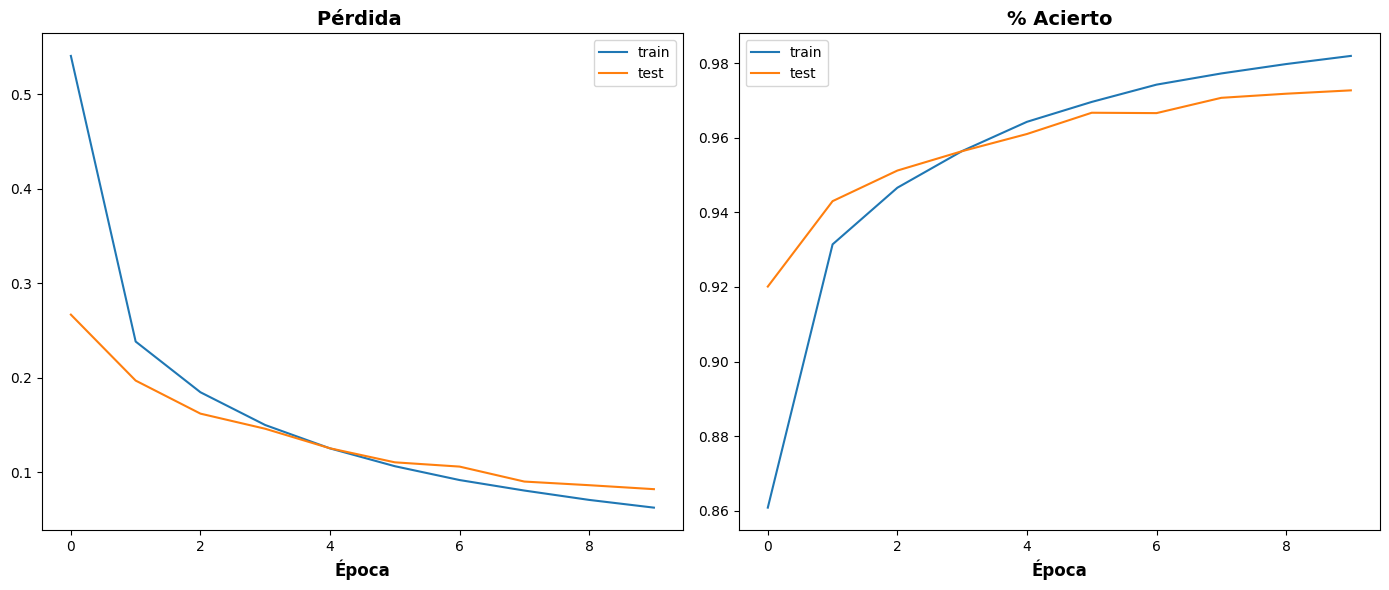

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_relu.history['loss'], label="train")
axs[0].plot(hist_relu.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu.history['accuracy'], label="train")
axs[1].plot(hist_relu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


*COMENTARIO

### Elu

In [ ]:
red_elu = keras.Sequential(name="red_elu")
red_elu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu.add(keras.layers.Dense(h1, activation='elu'))
red_elu.add(keras.layers.Dense(h2, activation='elu'))
red_elu.add(keras.layers.Dense(h3, activation='elu'))
red_elu.add(keras.layers.Dense(C, activation='softmax'))

red_elu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_elu = red_elu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_elu.save("red_elu.keras")

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4452 - accuracy: 0.8784 - val_loss: 0.2857 - val_accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2714 - accuracy: 0.9223 - val_loss: 0.2371 - val_accuracy: 0.9308
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2282 - accuracy: 0.9343 - val_loss: 0.2051 - val_accuracy: 0.9401
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1964 - accuracy: 0.9438 - val_loss: 0.1833 - val_accuracy: 0.9462
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1719 - accuracy: 0.9501 - val_loss: 0.1616 - val_accuracy: 0.9510
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1522 - accuracy: 0.9562 - val_loss: 0.1464 - val_accuracy: 0.9559
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1363 - accuracy: 0.9606 - val_loss: 0.1414 - val_accuracy:

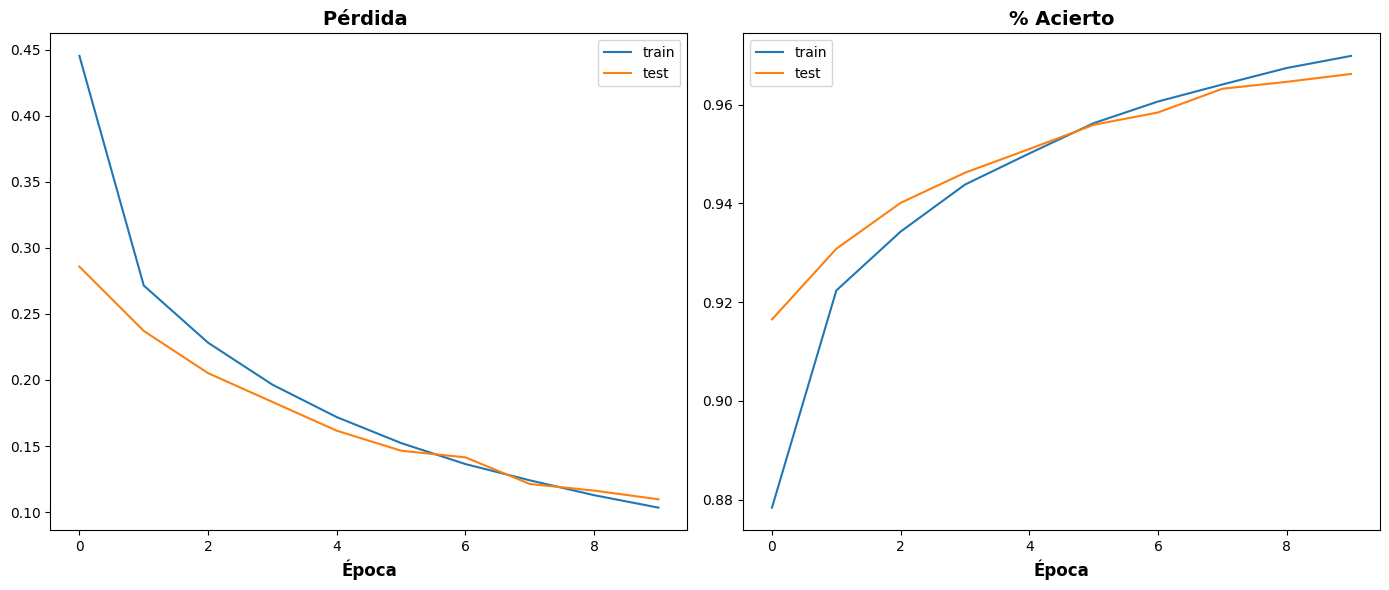

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu.history['loss'], label="train")
axs[0].plot(hist_elu.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu.history['accuracy'], label="train")
axs[1].plot(hist_elu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


#CONCLUSIONES RELU VS ELU

In [ ]:
relu_vs_elu = {
    'Métrica': list(hist_relu.history.keys()),
    'hist_relu': [hist_relu.history[k][-1] for k in hist_relu.history],
    'hist_elu': [hist_elu.history[k][-1] for k in hist_elu.history]
}

df = pd.DataFrame(relu_vs_elu)

display(df)

,Métrica,hist_relu,hist_elu
0,loss,0.062757,0.103367
1,accuracy,0.981933,0.969850
2,val_loss,0.082305,0.109686
3,val_accuracy,0.972700,0.966200


ReLU mostró una alta precisión en entrenamiento (0.9983) y una buena generalización en validación (0.9766), con una rápida convergencia (loss bajo). Sin embargo, existe el riesgo de "neuronas muertas", lo que puede afectar el aprendizaje en redes más profundas o con pesos mal inicializados.

ELU, en cambio, obtuvo resultados algo inferiores en ambas métricas (accuracy de 0.9705 en entrenamiento y 0.9643 en validación), con un mayor valor de pérdida, lo que indica una convergencia más lenta o menos eficiente. No obstante, su capacidad de producir salidas negativas ayuda a evitar el problema de las neuronas muertas, lo cual puede ser beneficioso en ciertos contextos o arquitecturas.

En resumen, ReLU se comportó mejor en este caso específico, pero ELU podría ofrecer ventajas en modelos más complejos o con problemas de desactivación de neuronas.

Ya que nuestro set de dato es simple nos eligirimos la funcion ReLU como funcion activadora para los siguientes cambios.

## Cambio batch size

### Batch size de 64

In [ ]:
red_batch64 = keras.Sequential(name="relu_bs_64")
red_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch64 = red_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )
red_batch64.save("red_batch64.keras")

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7958 - accuracy: 0.7967 - val_loss: 0.3406 - val_accuracy: 0.9033
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3055 - accuracy: 0.9130 - val_loss: 0.2602 - val_accuracy: 0.9251
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2464 - accuracy: 0.9294 - val_loss: 0.2207 - val_accuracy: 0.9349
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2111 - accuracy: 0.9399 - val_loss: 0.2018 - val_accuracy: 0.9422
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1851 - accuracy: 0.9465 - val_loss: 0.1744 - val_accuracy: 0.9465
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1649 - accuracy: 0.9531 - val_loss: 0.1612 - val_accuracy: 0.9539
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1483 - accuracy: 0.9577 - val_loss: 0.1571 - val_accuracy: 0.9532
Epoch 

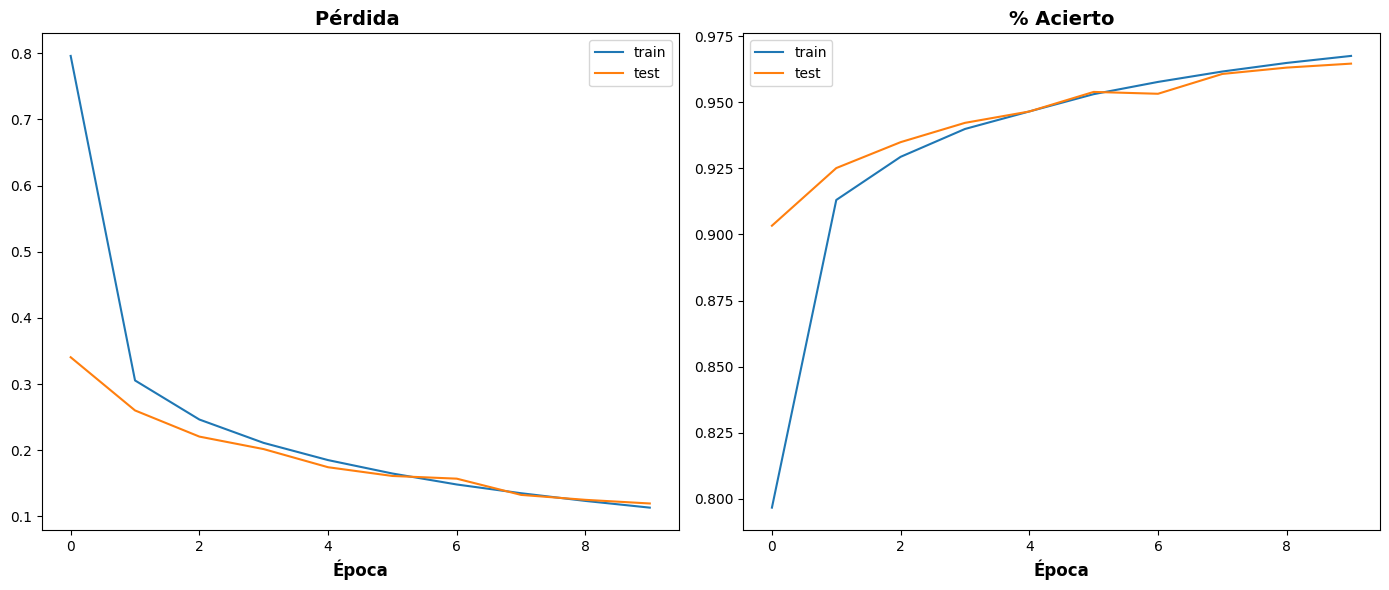

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch64.history['loss'], label="train")
axs[0].plot(hist_batch64.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch64.history['accuracy'], label="train")
axs[1].plot(hist_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


### Batch size de 256

In [ ]:
red_batch256 = keras.Sequential(name="batch256")
red_batch256.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch256.add(keras.layers.Dense(h1, activation='relu'))
red_batch256.add(keras.layers.Dense(h2, activation='relu'))
red_batch256.add(keras.layers.Dense(h3, activation='relu'))
red_batch256.add(keras.layers.Dense(C, activation='softmax'))

red_batch256.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch256 = red_batch256.fit(X_train, y_train,
        epochs=10,
        batch_size=256,
        validation_data=(X_test,y_test)
       )
red_batch256.save("red_batch256.keras")

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 1.6394 - accuracy: 0.6005 - val_loss: 0.8981 - val_accuracy: 0.8195
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6611 - accuracy: 0.8493 - val_loss: 0.4895 - val_accuracy: 0.8782
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.4460 - accuracy: 0.8838 - val_loss: 0.3851 - val_accuracy: 0.8967
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3733 - accuracy: 0.8985 - val_loss: 0.3366 - val_accuracy: 0.9066
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3355 - accuracy: 0.9069 - val_loss: 0.3113 - val_accuracy: 0.9118
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3102 - accuracy: 0.9132 - val_loss: 0.2903 - val_accuracy: 0.9179
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2910 - accuracy: 0.9178 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 

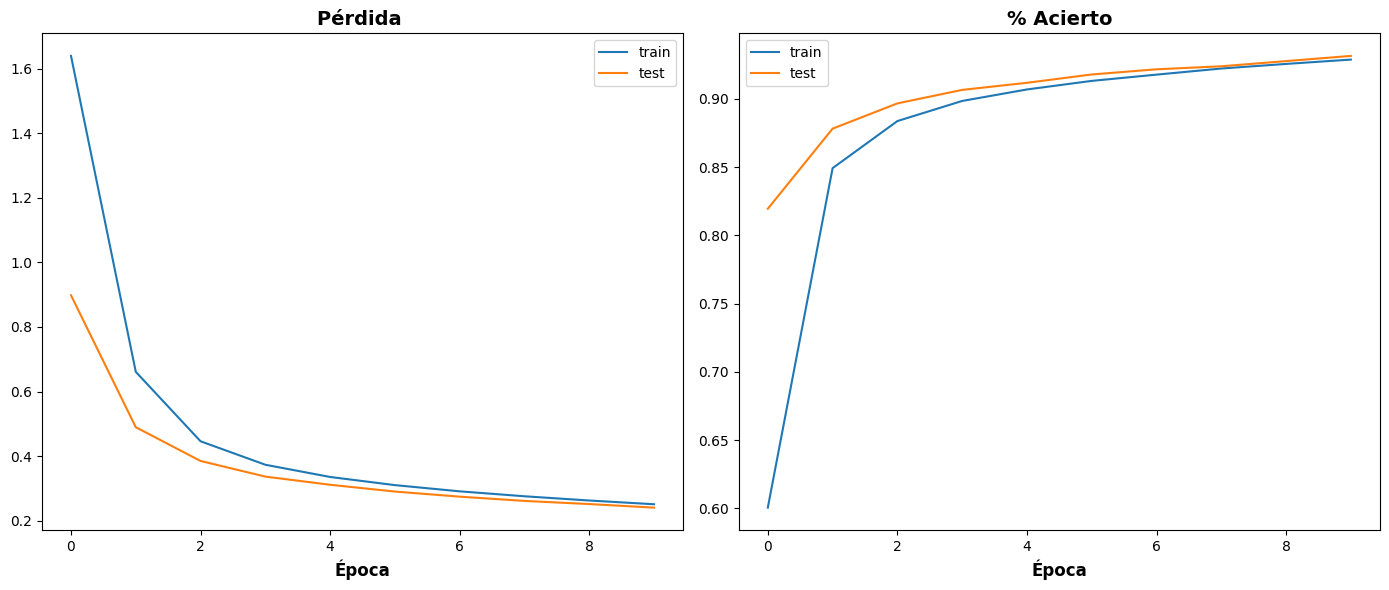

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch256.history['loss'], label="train")
axs[0].plot(hist_batch256.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch256.history['accuracy'], label="train")
axs[1].plot(hist_batch256.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [ ]:
Batch_size_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'batch size = 32': [hist_relu.history[k][-1] for k in hist_relu.history],
    'batch size = 64': [hist_batch64.history[k][-1] for k in hist_batch64.history],
    'batch size = 256': [hist_batch256.history[k][-1] for k in hist_batch256.history],
}

df_batch = pd.DataFrame(Batch_size_vs)

display(df_batch)

,Métrica,batch size = 32,batch size = 64,batch size = 256
0,loss,0.062757,0.113340,0.251012
1,accuracy,0.981933,0.967517,0.928817
2,val_loss,0.082305,0.119618,0.240513
3,val_accuracy,0.972700,0.964600,0.931500


El batch size más pequeño (32) produjo los mejores resultados tanto en entrenamiento como en validación. Tiene la mayor accuracy y val_accuracy, y las menores loss y val_loss A medida que el batch size aumenta, el rendimiento empeora:

La precisión (accuracy y val_accuracy) disminuye.

La pérdida (loss y val_loss) aumenta notablemente.

Batch sizes pequeños tienden a proporcionar un aprendizaje con mejores metricas (accuracy y perdida), ###al introducir más ruido estocástico que puede ayudar a salir de mínimos locales.

En cambio, batch sizes grandes pueden hacer que el modelo converja más rápido, pero a veces a soluciones menos óptimas. Pero batch sizes grandes pueden reducir el sobreentrenamiento, y se ve reflejado en la diferencia de accuracy y su validacion Batch size 32	con una diferencia de 0.0218, batch size de 64 con un diferencia de 0.0042 y batch size de 256 con una diferencia de 0.0050.

En conclucion:

Batch size pequeño (32): aprende muy bien, pero también tiende a memorizar más el entrenamiento con mayor riesgo de overfitting.

Batch size grande (256): aprende de forma más "estable", menos overfitting, pero también menor rendimiento o errores mas grandes

Ya que el sobre entrenmiento en nuestro caso no es tan grande nos quedaremos con un batch size de 32 ya que la perdida o el error es mucho mas bajo que los demas tamaños.

## Cambio de epochs

In [ ]:
red_epoca = keras.Sequential(name="Mi_Red")
red_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_epoca = red_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_epoca.save("red_epoca.keras")

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5471 - accuracy: 0.8612 - val_loss: 0.2614 - val_accuracy: 0.9260
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2372 - accuracy: 0.9317 - val_loss: 0.1980 - val_accuracy: 0.9443
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1841 - accuracy: 0.9468 - val_loss: 0.1634 - val_accuracy: 0.9521
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1506 - accuracy: 0.9565 - val_loss: 0.1515 - val_accuracy: 0.9556
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9637 - val_loss: 0.1266 - val_accuracy: 0.9617
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.1155 - val_accuracy: 0.9660
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.9733 - val_loss: 0.1117 - val_accuracy:

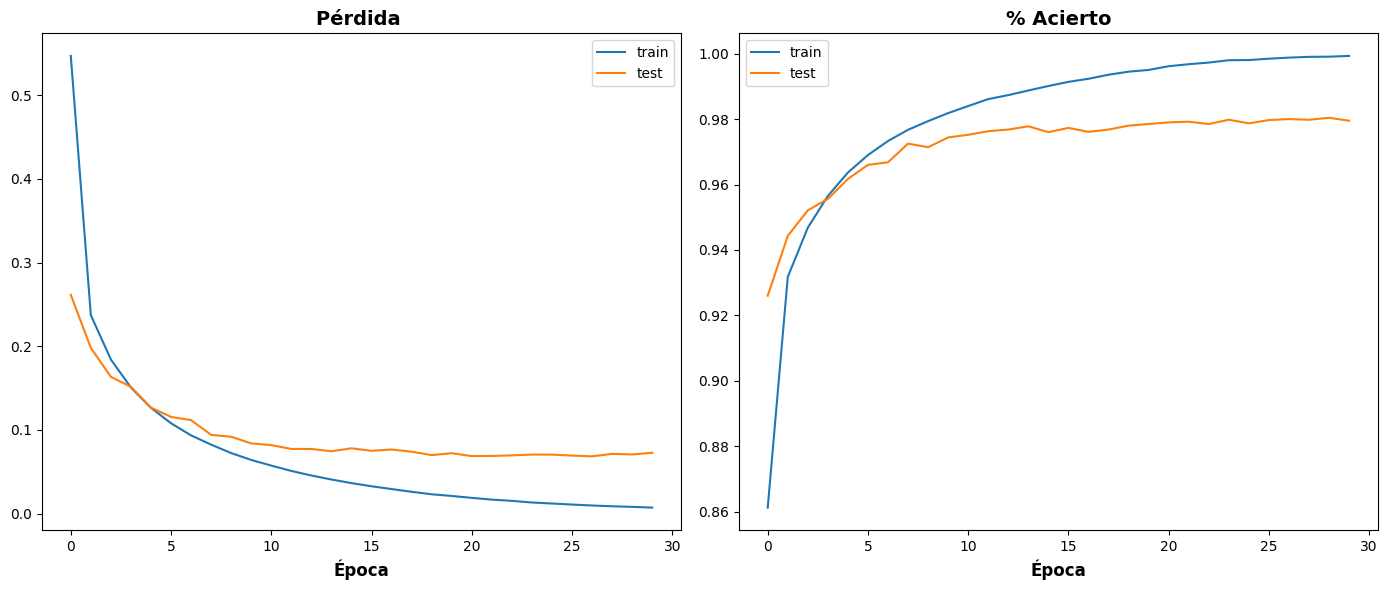

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_epoca.history['loss'], label="train")
axs[0].plot(hist_epoca.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_epoca.history['accuracy'], label="train")
axs[1].plot(hist_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [ ]:
Epoca_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'Epoca = 10': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Epoca = 30': [hist_epoca.history[k][-1] for k in hist_epoca.history],
    #'Epoca = 50': [.history[k][-1] for k in .history],
}

df_epoca = pd.DataFrame(Epoca_vs)

display(df_epoca)

,Métrica,Epoca = 10,Epoca = 30
0,loss,0.062757,0.007021
1,accuracy,0.981933,0.999317
2,val_loss,0.082305,0.072655
3,val_accuracy,0.972700,0.979500


Al aumentar las épocas de entrenamiento de 10 a 30, se observa una mejora general en todas las métricas.

El modelo logra una mayor precisión tanto en entrenamiento como en validación:

accuracy: sube ligeramente de 0.9984 → 0.9996

val_accuracy: también mejora, aunque de forma más modesta (0.9766 → 0.9787)

La pérdida (loss) disminuye en ambos conjuntos:

loss: se reduce casi a la mitad (0.0123 → 0.0068)

val_loss: también mejora, aunque de manera leve (0.0797 → 0.0778)

¡Buena pregunta! Aumentar la cantidad de épocas puede mejorar el rendimiento, pero también tiene costos y riesgos que vale la pena considerar. Te los explico:

⚖️ Costos de usar más épocas
1. 🕒 Mayor tiempo de entrenamiento
Cada época significa pasar una vez por todo el conjunto de datos, así que más épocas = más tiempo.

Esto puede ser costoso si:

El dataset es grande

Estás probando muchas configuraciones

Usas hardware limitado

2. 🧠 Riesgo de sobreentrenamiento (overfitting)
A partir de cierto punto, el modelo memoriza el conjunto de entrenamiento en vez de aprender a generalizar.

Esto se nota cuando:

accuracy sigue subiendo

pero val_accuracy se estanca o baja

y val_loss comienza a subir

En tu tabla, no se ve sobreentrenamiento aún, pero si entrenaras 100 épocas podrías empezar a verlo.

3. 💰 Mayor consumo de recursos
Más uso de GPU/CPU

Más energía (si entrenas en cloud, más costos)

Mayor desgaste de hardware si haces muchos ciclos largos

##Cambio numero de capas

In [ ]:
red_capa4 = keras.Sequential(name="Red_4capas")
red_capa4.add(keras.layers.Input(shape=(N,), name='entrada'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h2, activation='relu'))
red_capa4.add(keras.layers.Dense(h3, activation='relu'))
red_capa4.add(keras.layers.Dense(C, activation='softmax'))

red_capa4.summary()

Model: "Red_4capas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 830090 (3.17 MB)
Trainable params: 830090 (3.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####PREGUNTAR A LA PROFE SI O SI EL TAMAÑO DE NEURONA IENE QUE BAJAR; YO RENIA ENTENDIDO QUE NO Y SI SE PUEDE REPERTIR VALOR

In [ ]:
red_capa4.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_capa4 = red_capa4.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_capa4.save("red_capa4.keras")

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5330 - accuracy: 0.8573 - val_loss: 0.2430 - val_accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2136 - accuracy: 0.9378 - val_loss: 0.1734 - val_accuracy: 0.9503
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1564 - accuracy: 0.9541 - val_loss: 0.1389 - val_accuracy: 0.9591
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1228 - accuracy: 0.9644 - val_loss: 0.1336 - val_accuracy: 0.9610
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0996 - accuracy: 0.9713 - val_loss: 0.1026 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0821 - accuracy: 0.9760 - val_loss: 0.0972 - val_accuracy: 0.9695
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0695 - accuracy: 0.9801 - val_loss: 0.0992 - val_accuracy:

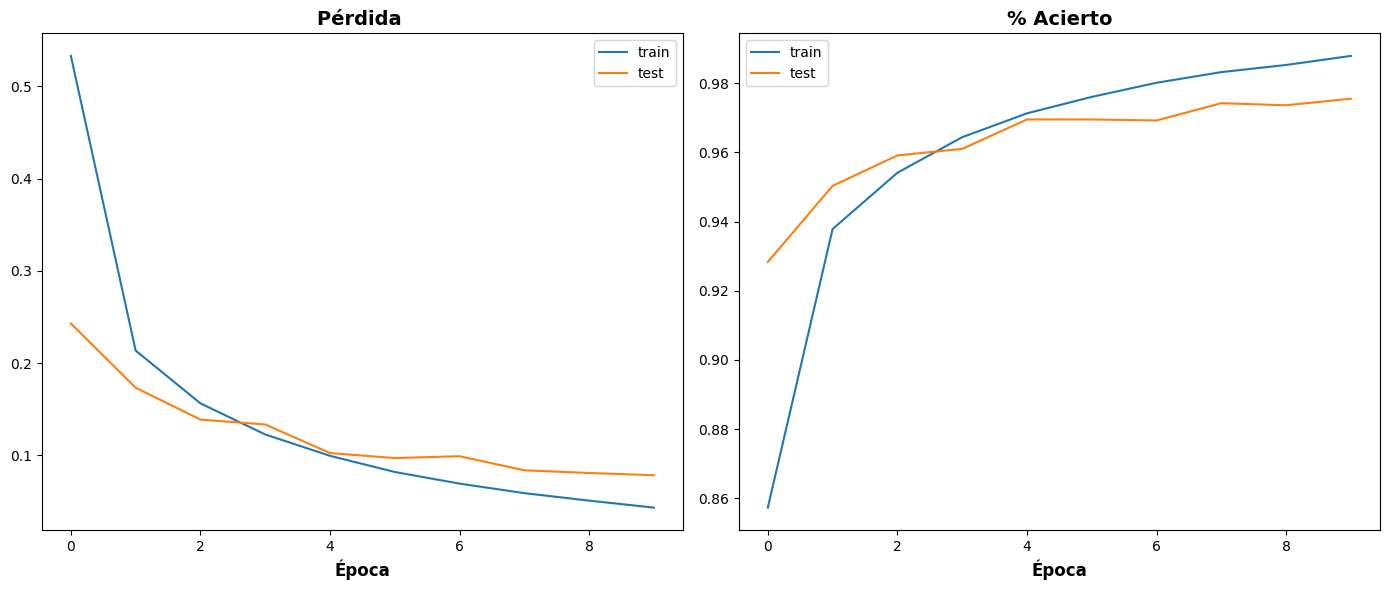

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_capa4.history['loss'], label="train")
axs[0].plot(hist_capa4.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_capa4.history['accuracy'], label="train")
axs[1].plot(hist_capa4.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [ ]:
Capas_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'Capas = 3': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Capas = 4': [hist_capa4.history[k][-1] for k in hist_capa4.history]
}

df_capas = pd.DataFrame(Capas_vs)

display(df_capas)

,Métrica,Capas = 3,Capas = 4
0,loss,0.062757,0.043433
1,accuracy,0.981933,0.987867
2,val_loss,0.082305,0.078554
3,val_accuracy,0.972700,0.975500


## Agregación de regulación (drop-out)

In [ ]:
red_dropout = keras.Sequential(name="red_dropout")
red_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_dropout.add(keras.layers.Dense(h1, activation='relu'))
#
red_dropout.add(keras.layers.Dense(30, activation='relu'))
red_dropout.add(keras.layers.Dropout(0.3))
red_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_dropout.summary()

Model: "red_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 30)                15390     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_23 (Dense)            (None, 20)                620       
                                                                 
 dense_24 (Dense)            (None, 256)               5376      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                

In [ ]:
red_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_dropout = red_dropout.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1691 - accuracy: 0.6108 - val_loss: 0.3290 - val_accuracy: 0.9041
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3918 - accuracy: 0.8825 - val_loss: 0.2092 - val_accuracy: 0.9362
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.9154 - val_loss: 0.1666 - val_accuracy: 0.9506
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9321 - val_loss: 0.1385 - val_accuracy: 0.9574
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1931 - accuracy: 0.9423 - val_loss: 0.1233 - val_accuracy: 0.9605
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9512 - val_loss: 0.1104 - val_accuracy: 0.9654
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9579 - val_loss: 0.1061 - val_accuracy:

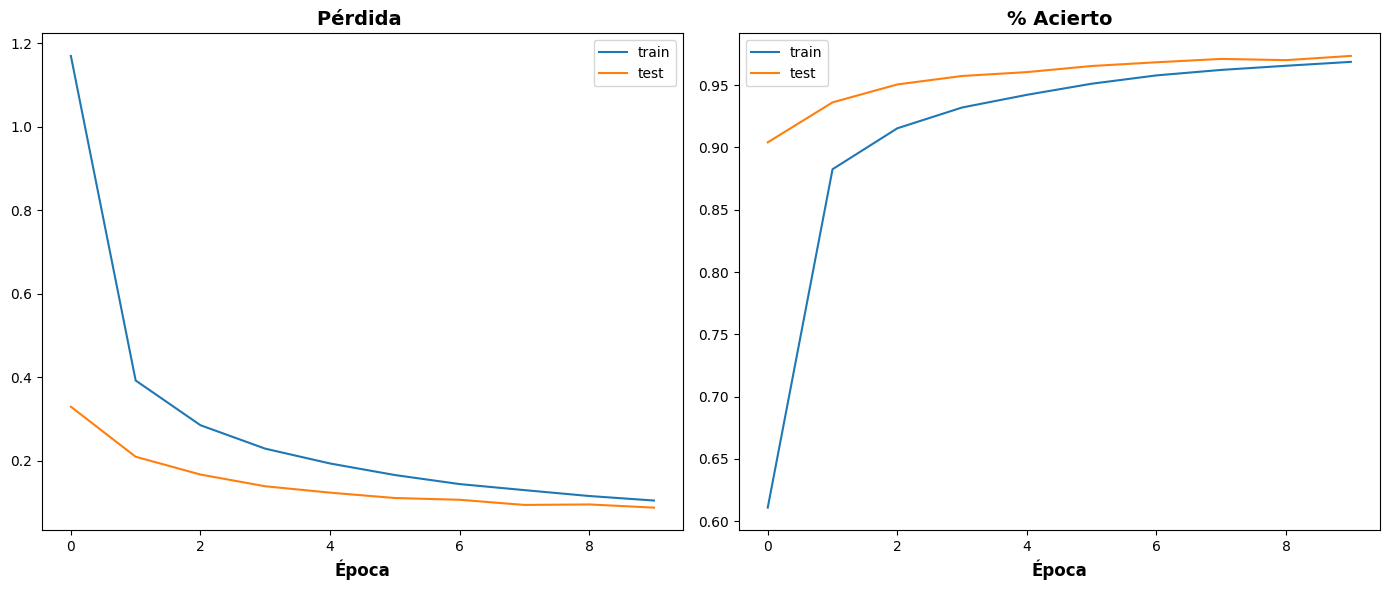

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_dropout.history['loss'], label="train")
axs[0].plot(hist_dropout.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_dropout.history['accuracy'], label="train")
axs[1].plot(hist_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [ ]:
Dropout_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'Sin DropOut': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Con DropOut': [hist_dropout.history[k][-1] for k in hist_dropout.history]
}

df_dropout = pd.DataFrame(Dropout_vs)

display(df_dropout)

,Métrica,Sin DropOut,Con DropOut
0,loss,0.062757,0.104325
1,accuracy,0.981933,0.968717
2,val_loss,0.082305,0.087339
3,val_accuracy,0.972700,0.973500


In [ ]:
###PRUEBA

modelos = [red_relu, red_elu, red_batch64, red_batch256, red_epoca, red_capa4, red_dropout]
historiales = [hist_relu, hist_elu, hist_batch64, hist_batch256, hist_epoca, hist_capa4, hist_dropout]

val_accuracies_final = [h.history['loss'][-1] for h in historiales]
indice_mejor = val_accuracies_final.index(min(val_accuracies_final))

mejor_modelo = modelos[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
mejor_val_acc = val_accuracies_final[indice_mejor]

print(f"El mejor modelo según loss final es: '{nombre_mejor_modelo}' ({mejor_val_acc:.4f})")
mejor_modelo.save('modelo_final.keras')

El mejor modelo según loss final es: 'Mi_Red' (0.0070)


In [ ]:
print("Resultados finales de cada modelo:\n")
for modelo, hist in zip(modelos, historiales):
    name = modelo.name
    acc = hist.history['accuracy'][-1]
    loss = hist.history['loss'][-1]
    val_acc = hist.history['val_accuracy'][-1]
    val_loss = hist.history['val_loss'][-1]

    print(f"Modelo: {name}")
    print(f"Accuracy:      {acc:.4f}")
    print(f"Loss:          {loss:.4f}")
    print(f"Val Accuracy:  {val_acc:.4f}")
    print(f"Val Loss:      {val_loss:.4f}\n")

Resultados finales de cada modelo:

🔸 Modelo: Red_relu
   - Accuracy:      0.9819
   - Loss:          0.0628
   - Val Accuracy:  0.9727
   - Val Loss:      0.0823

🔸 Modelo: red_elu
   - Accuracy:      0.9699
   - Loss:          0.1034
   - Val Accuracy:  0.9662
   - Val Loss:      0.1097

🔸 Modelo: relu_bs_64
   - Accuracy:      0.9675
   - Loss:          0.1133
   - Val Accuracy:  0.9646
   - Val Loss:      0.1196

🔸 Modelo: batch256
   - Accuracy:      0.9288
   - Loss:          0.2510
   - Val Accuracy:  0.9315
   - Val Loss:      0.2405

🔸 Modelo: Mi_Red
   - Accuracy:      0.9993
   - Loss:          0.0070
   - Val Accuracy:  0.9795
   - Val Loss:      0.0727

🔸 Modelo: Red_4capas
   - Accuracy:      0.9879
   - Loss:          0.0434
   - Val Accuracy:  0.9755
   - Val Loss:      0.0786

🔸 Modelo: red_dropout
   - Accuracy:      0.9687
   - Loss:          0.1043
   - Val Accuracy:  0.9735
   - Val Loss:      0.0873



# Experimento 2: Optimizador Adam

## Activadores (Relu y Elu)

### Relu

In [ ]:
red_relu_adam = keras.Sequential(name="Mi_Red")
red_relu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu_adam.add(keras.layers.Dense(h1, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h2, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h3, activation='relu'))
red_relu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_relu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_relu_adam = red_relu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
 4093/60000 [=>............................] - ETA: 2:14 - loss: 0.6083 - accuracy: 0.8085

KeyboardInterrupt: 

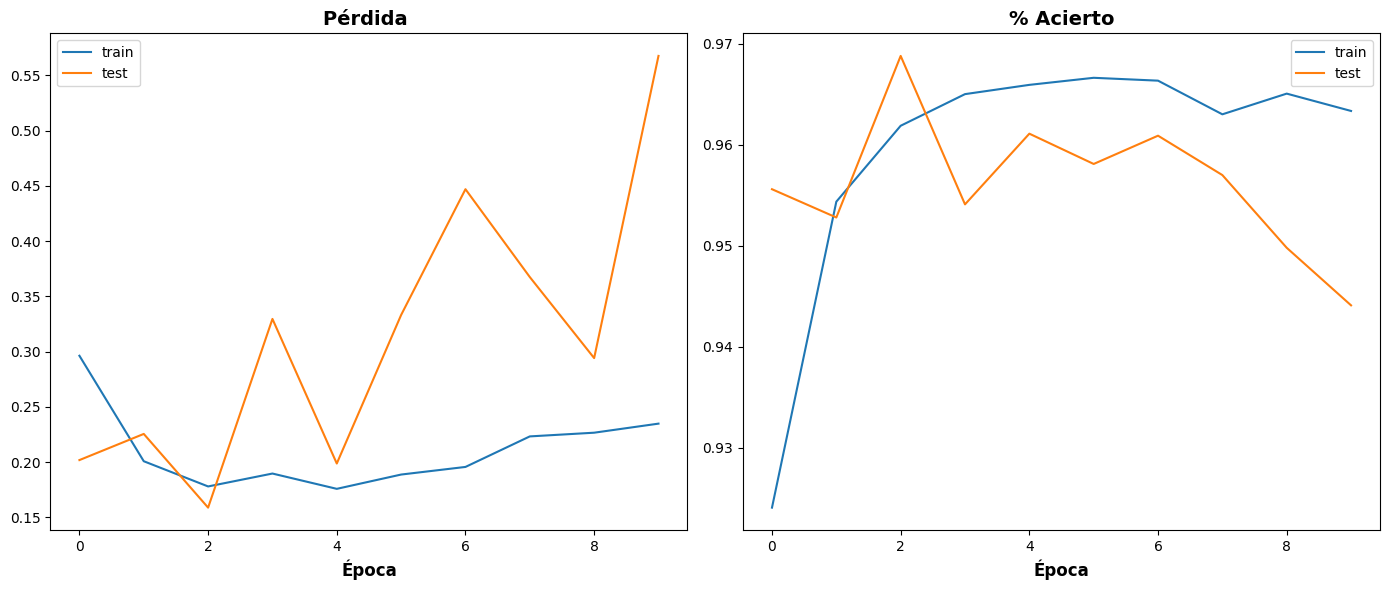

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#axs.set_title('Activadores (Relu y Elu)', fontsize=14, fontweight="bold")

axs[0].plot(hist_relu_adam.history['loss'], label="train")
axs[0].plot(hist_relu_adam.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu_adam.history['accuracy'], label="train")
axs[1].plot(hist_relu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()


# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


### ELU

In [ ]:
red_elu_adam = keras.Sequential(name="Mi_Red")
red_elu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu_adam.add(keras.layers.Dense(h1, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h2, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h3, activation='elu'))
red_elu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_elu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Increased batch size to speed up training and avoid keyboard interrupt
hist_elu_adam = red_elu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=64,  # Changed from 1 to 64 to speed up training
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2319 - accuracy: 0.9302 - val_loss: 0.1452 - val_accuracy: 0.9571
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1113 - accuracy: 0.9652 - val_loss: 0.1063 - val_accuracy: 0.9657
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0799 - accuracy: 0.9747 - val_loss: 0.0830 - val_accuracy: 0.9749
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1134 - val_accuracy: 0.9668
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0922 - val_accuracy: 0.9768
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoc

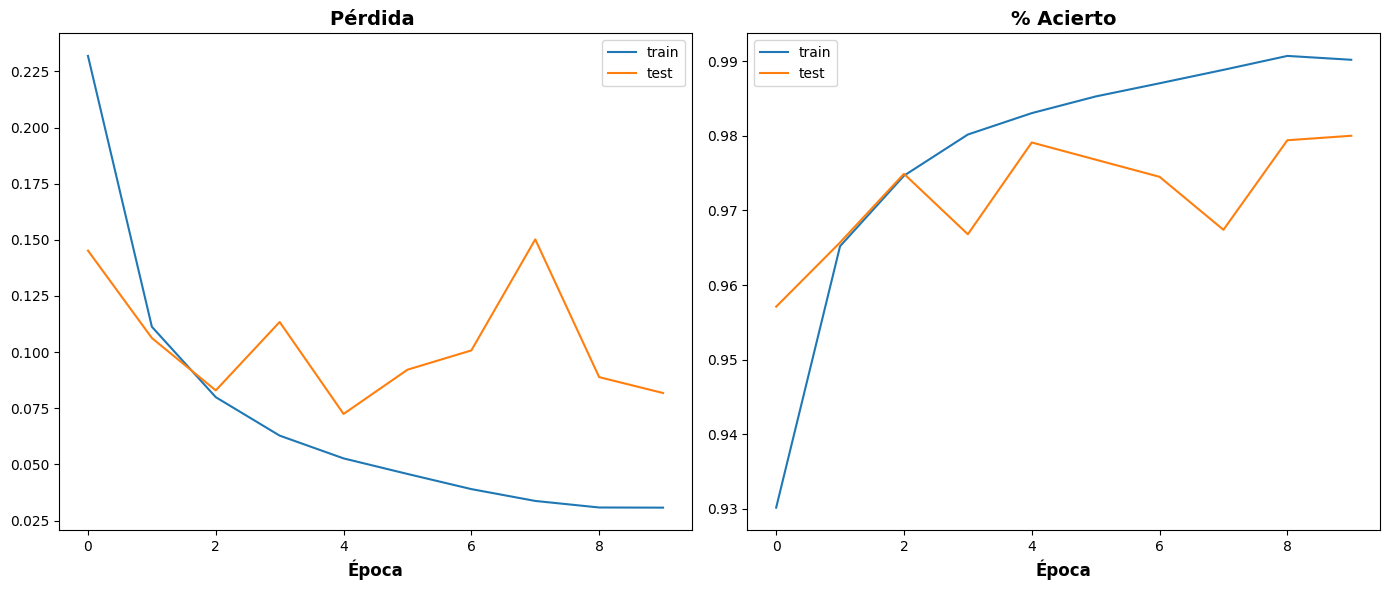

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu_adam.history['loss'], label="train")
axs[0].plot(hist_elu_adam.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu_adam.history['accuracy'], label="train")
axs[1].plot(hist_elu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


# #

# Cambio Batch Size

# Cambio Batch Size de 32


In [ ]:
red_adam_batch32 = keras.Sequential(name="Mi_Red")
red_adam_batch32.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch32.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch32.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch32 = red_adam_batch32.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1942 - accuracy: 0.9415 - val_loss: 0.1263 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0897 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0763 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0743 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0714 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0837 - val_acc

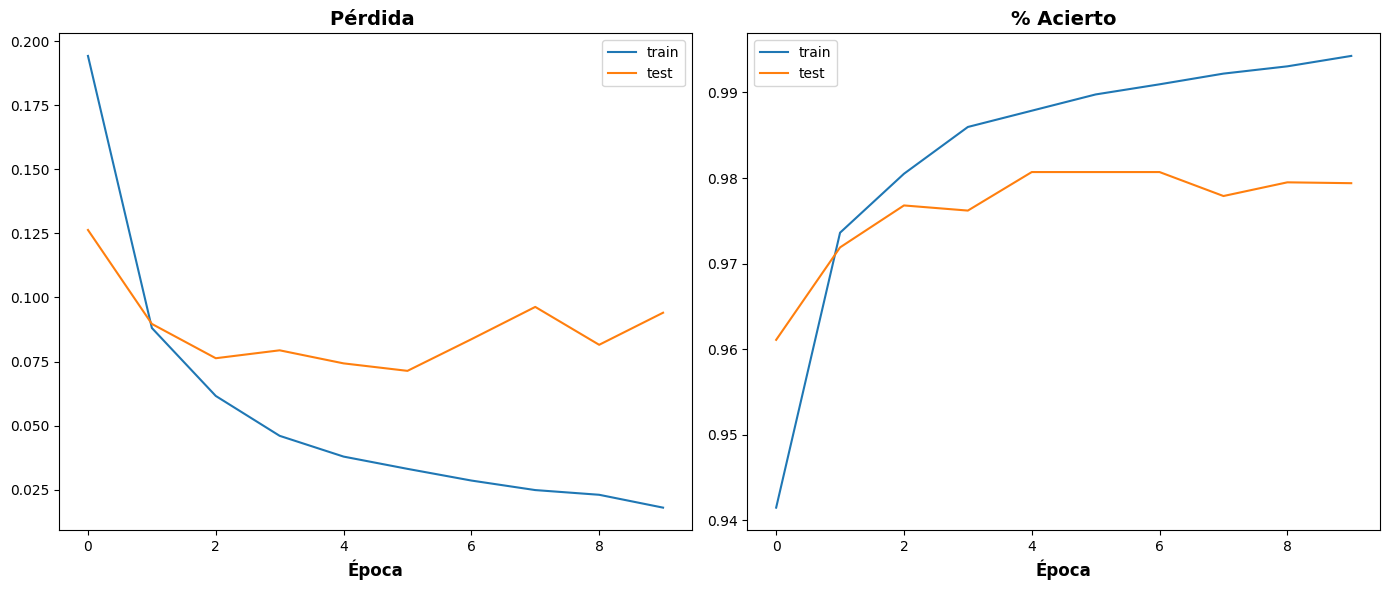

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch32.history['loss'], label="train")
axs[0].plot(hist_adam_batch32.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch32.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch32.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()



## Cambio Batch Size de 64

In [ ]:
red_adam_batch64 = keras.Sequential(name="Mi_Red")
red_adam_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch64 = red_adam_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2062 - accuracy: 0.9386 - val_loss: 0.1402 - val_accuracy: 0.9518
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0792 - val_accuracy: 0.9761
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0939 - val_accuracy: 0.9760
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0779 - val_accuracy: 0.9797
Epoch 

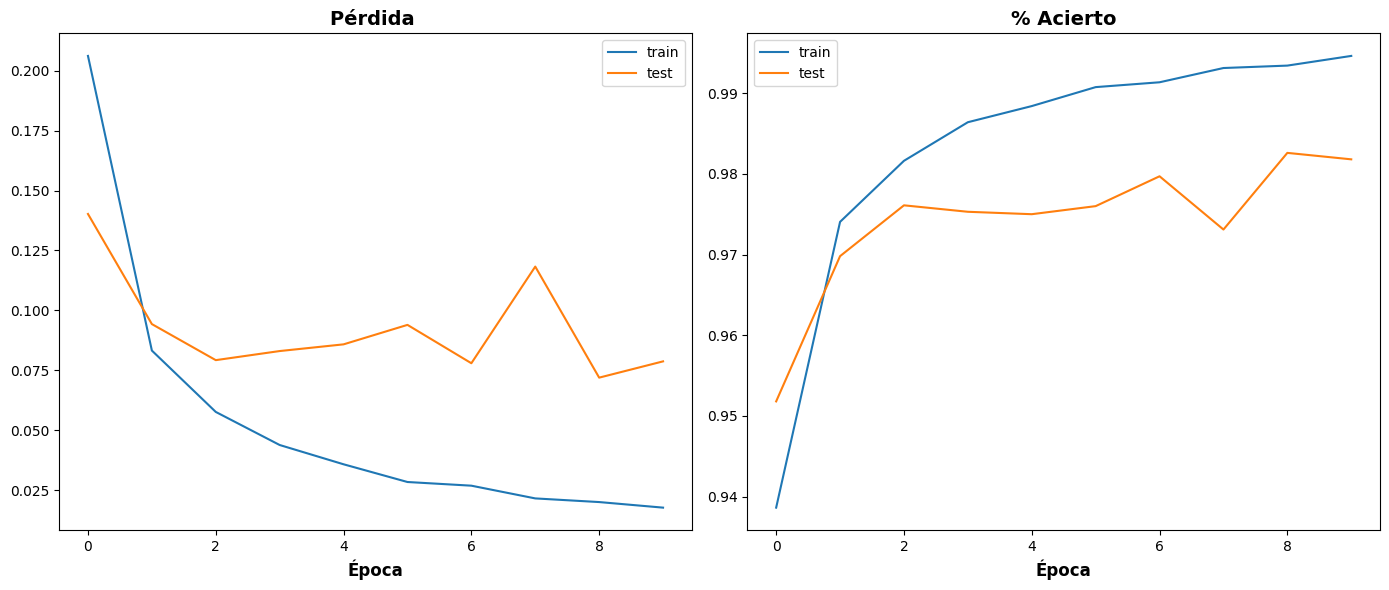

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch64.history['loss'], label="train")
axs[0].plot(hist_adam_batch64.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch64.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

## Cambio de epocas

In [ ]:
red_adam_epoca = keras.Sequential(name="Mi_Red")
red_adam_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_adam_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_epoca = red_adam_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
938/938 [==============================] - 7s 6ms/step - loss: 0.2075 - accuracy: 0.9380 - val_loss: 0.1532 - val_accuracy: 0.9523
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0916 - val_accuracy: 0.9705
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0948 - val_accuracy: 0.9745
Epoch 6/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0796 - val_accuracy: 0.9798
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0770 - val_accuracy: 0.9795
Epoch 

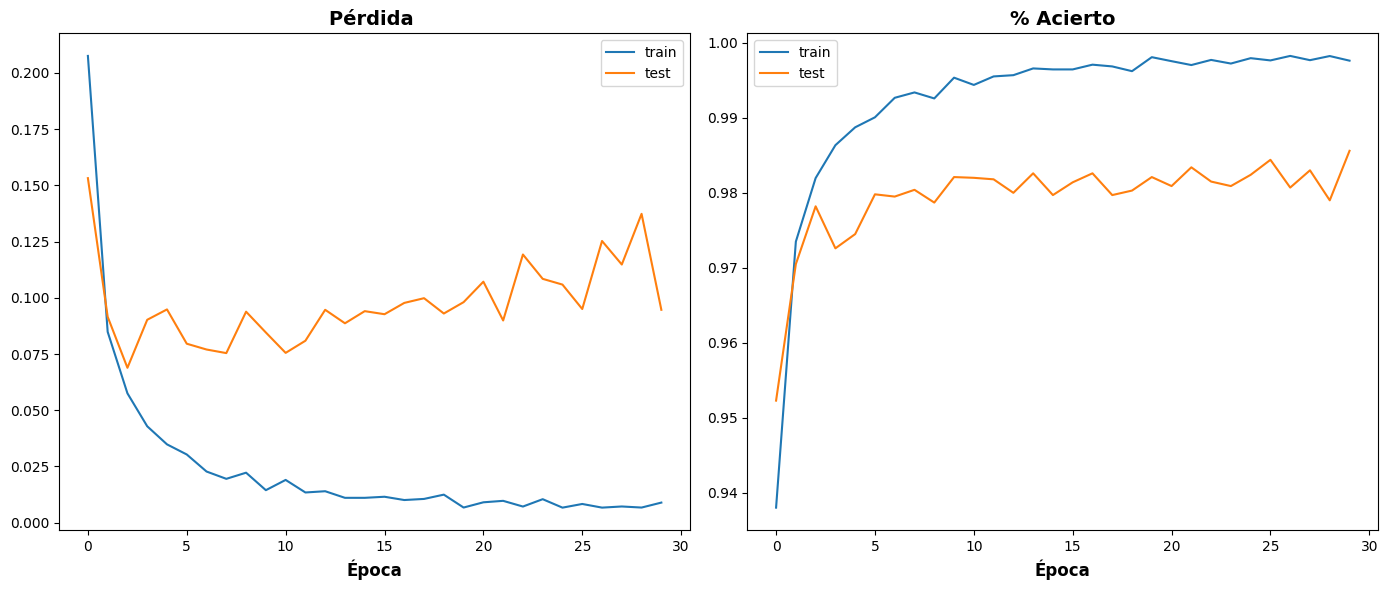

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_epoca.history['loss'], label="train")
axs[0].plot(hist_adam_epoca.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_epoca.history['accuracy'], label="train")
axs[1].plot(hist_adam_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

## Agregación de regulación (drop-out)

In [ ]:
red_adam_dropout= keras.Sequential(name="Mi_Red")
red_adam_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
#
red_adam_dropout.add(keras.layers.Dense(30, activation='relu'))
red_adam_dropout.add(keras.layers.Dropout(0.3))
red_adam_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_adam_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_adam_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_adam_dropout = red_adam_dropout.fit(X_train, y_train,
        epochs=30,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 2.1976 - accuracy: 0.2510 - val_loss: 1.8218 - val_accuracy: 0.5131
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 1.3008 - accuracy: 0.5692 - val_loss: 0.7278 - val_accuracy: 0.7847
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.8190 - accuracy: 0.7292 - val_loss: 0.5171 - val_accuracy: 0.8521
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.6688 - accuracy: 0.7879 - val_loss: 0.4222 - val_accuracy: 0.8808
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5871 - accuracy: 0.8173 - val_loss: 0.3778 - val_accuracy: 0.8913
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5294 - accuracy: 0.8370 - val_loss: 0.3365 - val_accuracy: 0.9023
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.4876 - accuracy: 0.8501 - val_loss: 0.3223 - val_accuracy: 0.9049
Epoch 

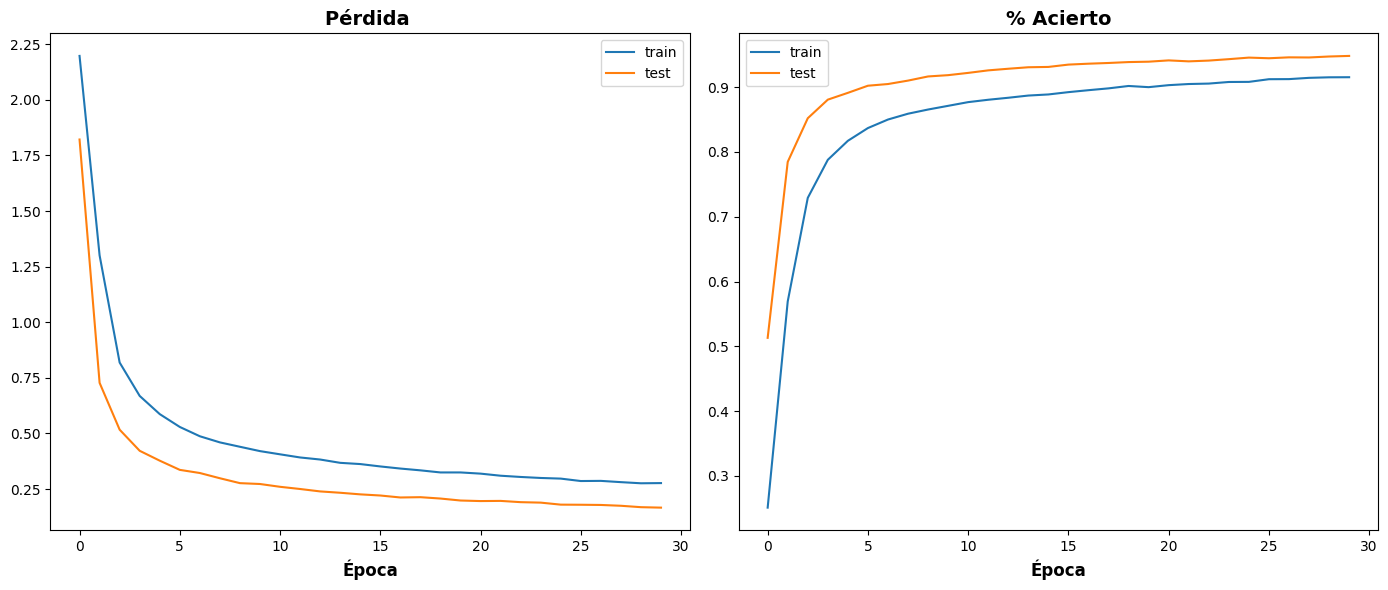

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_dropout.history['loss'], label="train")
axs[0].plot(hist_adam_dropout.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_dropout.history['accuracy'], label="train")
axs[1].plot(hist_adam_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=952c4989-d7be-4048-8bbc-02e7b294e3b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>